In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import time
import bacteria_numba_no_saturation as bacnosat
import bacteria_numba as bacsat
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


Bad key text.latex.preview in file /home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default qualit

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [43]:
r = 0.69/(3600) # s⁻¹
k = 0.1
chi = 5 # μm²/ms
gamma = r/k
lambd = 1.25
q = 1.5/1e5 # μM/100s
beta = 1
alpha = 1

D_b = 50.2/1000 # μm²/ms
D_s = 800/1000 # μm²/ms
t_c = 10
t_f = 400
t_max = 1000000000#*(t_c/128)
dt_size = 64
x_max = 10
x_L = 5
dx = 0.1
n = int(x_max/dx)
S_plus = 100 # μM
S_minus = 0.01 # μM
S_max = 1 # μM
save_every = 1000

# Initial condition
S = np.zeros(n)
# rho1 = np.random.uniform(0.04, 0.04, n)
# rho2 = rho1.copy()
rho = np.random.uniform(0.04, 0.04, n)

print('\nReady to run simulations. Making a test before starting \n')

test = bacsat.solve_model(5, rho, S, 0, 10, n, D_s, D_b, chi, r, k, lambd, 1, 5, 0.6,
                   beta, S_plus, S_minus, S_max, 32, save_every)

print("\nTest concluded. Proceeding with simulation... \n")

# Initial condition
S = np.zeros(n)
# rho1 = np.random.uniform(0.04, 0.04, n)
# rho2 = rho1.copy()
rho = np.random.uniform(k, k, n)

# rhos1, rhos2, Ss, tot_rho1, tot_rho2, tot_S, idx, dx, dt, x = solve_model(t_max, rho1, rho2, S, 0,
#                                                                            x_max, n, D_s, D_b, chi,
#                                                                            r, k, lambd, t_c, t_f, x_L,
#                                                                            q, beta, dt_size, alpha,
#                                                                            S_plus, S_minus, S_max)
rhos, Ss, tot_rho, tot_S, death_by_competition, death_by_substance, idx, dx, dt, x = bacsat.solve_model(t_max, rho, S, 0,
                                                        x_max, n, D_s, D_b, chi,
                                                        r, k, lambd, t_c, x_L,
                                                        q, beta, S_plus, S_minus, S_max, dt_size, save_every)


Ready to run simulations. Making a test before starting 

Still computing... step: 0

Test concluded. Proceeding with simulation... 

Still computing... step: 0
Still computing... step: 1000000
Still computing... step: 2000000
Still computing... step: 3000000
Still computing... step: 4000000
Still computing... step: 5000000
Still computing... step: 6000000
Still computing... step: 7000000
Still computing... step: 8000000
Still computing... step: 9000000
Still computing... step: 10000000
Still computing... step: 11000000
Still computing... step: 12000000
Still computing... step: 13000000
Still computing... step: 14000000
Still computing... step: 15000000
Still computing... step: 16000000
Still computing... step: 17000000
Still computing... step: 18000000
Still computing... step: 19000000
Still computing... step: 20000000
Still computing... step: 21000000
Still computing... step: 22000000
Still computing... step: 23000000
Still computing... step: 24000000
Still computing... step: 250000

In [44]:
r = 0.69/(3600) # s⁻¹
k = 0.1
chi = 0 # μm²/ms
gamma = r/k
lambd = 1.25
q = 1.5/1e5 # μM/100s
beta = 1
alpha = 1

D_b = 50.2/1000 # μm²/ms
D_s = 800/1000 # μm²/ms
t_c = 10
t_f = 400
t_max = 1000000000#*(t_c/128)
dt_size = 64
x_max = 10
x_L = 1
dx = 0.1
n = int(x_max/dx)
S_plus = 30 # μM
S_minus = 1 # μM
S_max = 1 # μM
save_every = 1000

# Initial condition
S = np.zeros(n)
# rho1 = np.random.uniform(0.04, 0.04, n)
# rho2 = rho1.copy()
rho = np.random.uniform(0.04, 0.04, n)

print('\nReady to run simulations. Making a test before starting \n')

test = bacsat.solve_model(5, rho, S, 0, 10, n, D_s, D_b, chi, r, k, lambd, 1, 5, 0.6,
                   beta, S_plus, S_minus, S_max, 32, save_every)

print("\nTest concluded. Proceeding with simulation... \n")

# Initial condition
S = np.zeros(n)
# rho1 = np.random.uniform(0.04, 0.04, n)
# rho2 = rho1.copy()
rho = np.random.uniform(k, k, n)

# rhos1, rhos2, Ss, tot_rho1, tot_rho2, tot_S, idx, dx, dt, x = solve_model(t_max, rho1, rho2, S, 0,
#                                                                            x_max, n, D_s, D_b, chi,
#                                                                            r, k, lambd, t_c, t_f, x_L,
#                                                                            q, beta, dt_size, alpha,
#                                                                            S_plus, S_minus, S_max)
rhos2, Ss2, tot_rho2, tot_S2, death_by_competition2, death_by_substance2, idx2, dx2, dt2, x2 = bacsat.solve_model(t_max, rho, S, 0,
                                                        x_max, n, D_s, D_b, chi,
                                                        r, k, lambd, t_c, x_L,
                                                        q, beta, S_plus, S_minus, S_max, dt_size, save_every)


Ready to run simulations. Making a test before starting 

Still computing... step: 0

Test concluded. Proceeding with simulation... 

Still computing... step: 0
Still computing... step: 1000000
Still computing... step: 2000000
Still computing... step: 3000000
Still computing... step: 4000000
Still computing... step: 5000000
Still computing... step: 6000000
Still computing... step: 7000000
Still computing... step: 8000000
Still computing... step: 9000000
Still computing... step: 10000000
Still computing... step: 11000000
Still computing... step: 12000000
Still computing... step: 13000000
Still computing... step: 14000000
Still computing... step: 15000000
Still computing... step: 16000000
Still computing... step: 17000000
Still computing... step: 18000000
Still computing... step: 19000000
Still computing... step: 20000000
Still computing... step: 21000000
Still computing... step: 22000000
Still computing... step: 23000000
Still computing... step: 24000000
Still computing... step: 250000

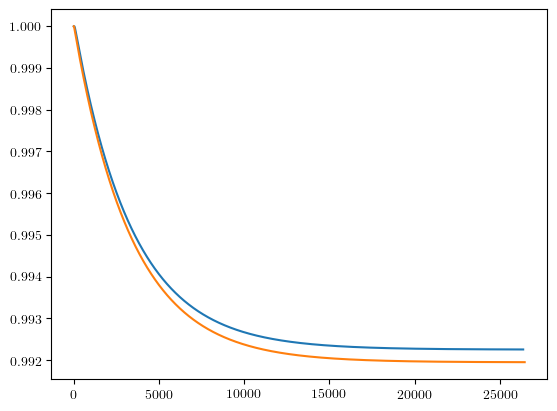

In [45]:
plt.plot(tot_rho)
plt.plot(tot_rho2)
plt.show()

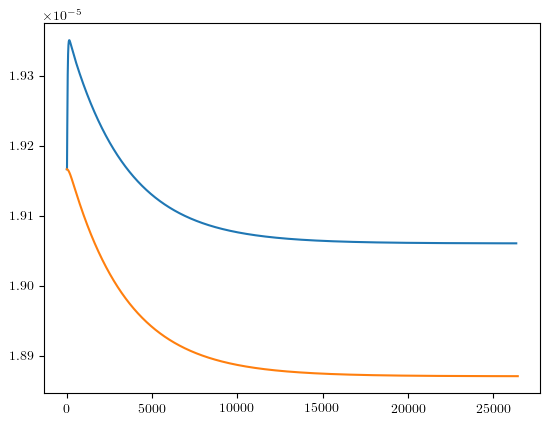

In [48]:
plt.plot(death_by_competition)
plt.plot(death_by_competition2)
# plt.plot(death_by_substance)
# plt.plot(death_by_substance2)
# plt.yscale('log')
plt.show()

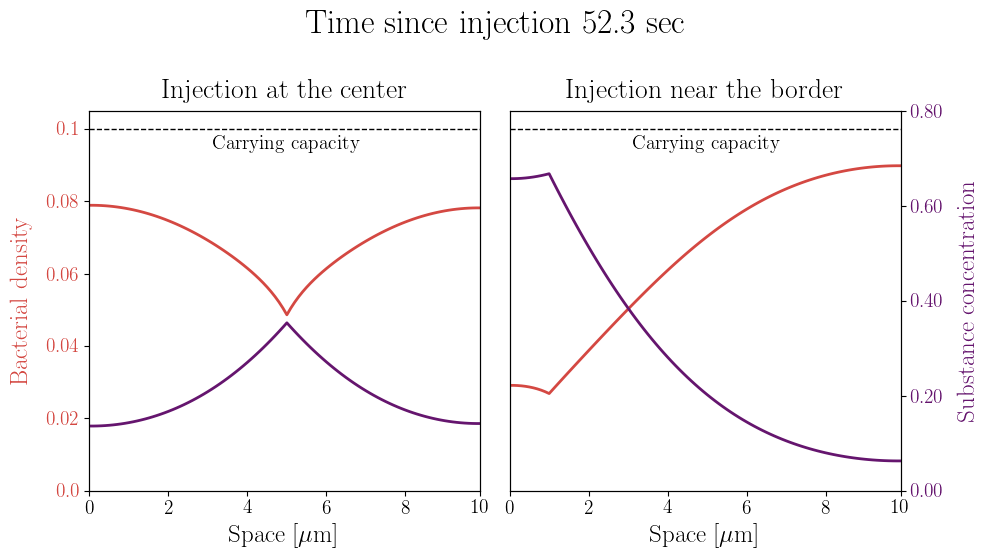

In [118]:
index = 80000

fig, ax = plt.subplots(1, 2, figsize = (10,5))
ax[0].plot(rhos[index], lw = 2, color = sns.color_palette('inferno')[3])
# plt.plot(Ss[240000])
ax[0].set_xlim(0, 99)
ax[0].set_ylim(0, 0.105)
ax[0].axhline(0.1, lw = 1, ls = '--', color = 'black')
ax[0].set_xticks([0,20,40,60,80,99])
ax[0].set_xticklabels(labels = [0,2,4,6,8,10], fontsize = 14)
ax[0].set_xlabel(r'Space [$\mu \mathrm{m}$]', fontsize = 18)
ax[0].set_yticklabels(ax[0].get_yticks(), fontsize = 14, color = sns.color_palette('inferno')[3])
ax[0].set_title('Injection at the center', fontsize = 20, pad = 10)
ax[0].set_ylabel('Bacterial density', fontsize = 18, color = sns.color_palette('inferno')[3],
                weight = 'bold', labelpad = 10)
ax[0].text(50, 0.098, 'Carrying capacity', fontsize = 14, va = 'top', ha = 'center')

ax2 = ax[0].twinx()
ax2.plot(Ss[index], lw = 2, color = sns.color_palette('inferno')[1])
ax2.set_ylim(0, 0.8)
ax2.set_yticks([])

##########################################################################
ax[1].plot(rhos2[index], lw = 2, color = sns.color_palette('inferno')[3])
# plt.plot(Ss[240000])
ax[1].set_xlim(0, 99)
ax[1].set_ylim(0, 0.105)
ax[1].axhline(0.1, lw = 1, ls = '--', color = 'black')
ax[1].set_xticks([0,20,40,60,80,99])
ax[1].set_xticklabels(labels = [0,2,4,6,8,10], fontsize = 14)
ax[1].set_xlabel(r'Space [$\mu \mathrm{m}$]', fontsize = 18)
ax[1].set_yticks([])
ax[1].set_title('Injection near the border', fontsize = 20, pad = 10)
ax[1].text(50, 0.098, 'Carrying capacity', fontsize = 14, va = 'top', ha = 'center')

ax3 = ax[1].twinx()
ax3.plot(Ss2[index], lw = 2, color = sns.color_palette('inferno')[1])
ax3.set_ylim(0, 0.8)
ax3.set_yticks([0,0.2,0.4,0.6,0.8])
ax3.set_yticklabels([f"{ax3.get_yticks()[i]:.2f}" for i in range(len(ax3.get_yticks()))],
                    fontsize = 14, color = sns.color_palette('inferno')[1])
ax3.set_ylabel('Substance concentration', fontsize = 18, weight = 'bold',
               color = sns.color_palette('inferno')[1], labelpad = 10)

fig.text(0.5, 1.06, f'Time since injection {(index*dt - 10):.1f} sec', ha = 'center', fontsize = 24)
plt.tight_layout()
fig.patch.set_alpha(0.2)
plt.savefig(f'Plots/Profile_scenarios_injection_center_and_border_t={(index*dt - 10):.2f}.png',
            dpi = 300, bbox_inches = 'tight')
plt.savefig(f'Plots/Profile_scenarios_injection_center_and_border_t={(index*dt - 10):.2f}.svg',
            dpi = 300, bbox_inches = 'tight')
plt.show()